# Europe Wind Farm Data

## Data Description

The Europe Wind Farm data
set containing the day-ahead forecasts of 45 wind farms
(off- and onshore) scattered over the European continent as
shown in Fig. 6. The data set contains hourly averaged wind
power generation time series for two consecutive years and
the corresponding day-ahead meteorological forecasts using
the European Centre for Medium-Range Weather Forecasts
(ECMWF) weather model. 

The power generation time series are normalized with the
respective nominal capacity of the wind farm in order to
enable a scale-free comparison and to mask the original
characteristics of the wind farm. Additionally, all weather
situations are normalized in the range [0..1]. The data set is
pre-filtered to discard any period of time longer than 24h in
which no energy has been produced, as this is an indicator
of a wind farm malfunction.

The data set contains the
following data items:

- Time Stamp of the forecast / power measurement

__Forecasts__
- Forecasting Time Step - Time between the creation of the forecast to the forecasted point in time  
- Wind Speed in 100m height
- Wind Speed in 10m height
- Wind Direction (zonal) in 100m height
- Wind Direction (meridional) in 100m height
- Air Pressure Forecast of the measurement
- Air Temperature Forecast of the measurement  

__Power Observations__
- Wind Farm Power Generation Observations 


### Import Libraries Modules

In [3]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
from IPython.display import display

### Algorithm for reading multiple csvs at once

__0. Set path folder (wind farm data)__

__1. FOR LOOOP on .csv files__
     
     IN FOR LOOP:
     
    * read csv file, savre it in a dataframe
    * save number of rows (length)
    * save number of columns
    * save df
   
__2. Get a list (or array) containing (at least) each df for each csv file.__

__3. Explore different df__


In [4]:
wf_path = r'C:\Users\dabre\OneDrive\Desktop\WindForecasting_CapstoneProject\data1'

In [5]:
# save all csv files in a dataframe
import csv
import os
import glob
#('*.csv')# find all csv files in a pathname
os.chdir(wf_path)
csv_files = [i for i in glob.glob('*.csv')]
csv_files

['wf1.csv',
 'wf10.csv',
 'wf11.csv',
 'wf12.csv',
 'wf13.csv',
 'wf14.csv',
 'wf15.csv',
 'wf16.csv',
 'wf17.csv',
 'wf18.csv',
 'wf19.csv',
 'wf2.csv',
 'wf20.csv',
 'wf21.csv',
 'wf22.csv',
 'wf23.csv',
 'wf24.csv',
 'wf25.csv',
 'wf26.csv',
 'wf27.csv',
 'wf28.csv',
 'wf29.csv',
 'wf3.csv',
 'wf30.csv',
 'wf31.csv',
 'wf32.csv',
 'wf33.csv',
 'wf34.csv',
 'wf35.csv',
 'wf36.csv',
 'wf37.csv',
 'wf38.csv',
 'wf39.csv',
 'wf4.csv',
 'wf40.csv',
 'wf41.csv',
 'wf42.csv',
 'wf43.csv',
 'wf44.csv',
 'wf45.csv',
 'wf5.csv',
 'wf6.csv',
 'wf7.csv',
 'wf8.csv',
 'wf9.csv',
 'wf_rm3.csv']

In [6]:
# Read each csv file and store in a dictionary containing file name and dataframe
import ntpath
dict_files={}
files_names=[]
for files in csv_files:
    df = pd.read_csv(files,engine='python',index_col=0, parse_dates=True)
    basepath, filename=ntpath.split(files)
    files_names.append(filename)
    dict_files[filename]=df
#list(dict_files.keys()

# Calculate number of rows and features for each df and store in a list of tuples
shape_df=[]
for i in range(0,len(dict_files.keys())):
    nrows, ncols=(len(dict_files[files_names[i]]), len(dict_files[files_names[i]].columns))
    shape_df.append((nrows,ncols))
shape_df

[(16920, 9),
 (11762, 9),
 (16706, 9),
 (15738, 9),
 (12896, 9),
 (12388, 9),
 (17325, 9),
 (12827, 9),
 (16873, 9),
 (17458, 9),
 (15356, 9),
 (11856, 9),
 (17141, 9),
 (17295, 9),
 (17227, 9),
 (17486, 9),
 (15105, 9),
 (16933, 9),
 (17148, 9),
 (12703, 9),
 (17239, 9),
 (17440, 9),
 (15927, 9),
 (14382, 9),
 (14434, 9),
 (16006, 9),
 (15887, 9),
 (14161, 9),
 (17313, 9),
 (13794, 9),
 (11661, 9),
 (15180, 9),
 (10416, 9),
 (14828, 9),
 (12412, 9),
 (15018, 9),
 (12446, 9),
 (11877, 9),
 (11583, 9),
 (10858, 9),
 (13065, 9),
 (13508, 9),
 (15176, 9),
 (12978, 9),
 (14915, 9),
 (16920, 10)]

In [7]:
df = dict_files[files_names[0]]
df.head()

,ForecastingTime,AirPressure,Temperature,Humidity,WindSpeed100m,WindSpeed10m,WindDirectionZonal,WindDirectionMeridional,PowerGeneration
Time,,,,,,,,,
0000-01-01 01:00:00,25,0.392238,0.406113,0.638134,0.625094,0.548931,0.820776,0.883540,0.506970
0000-01-01 02:00:00,26,0.379920,0.405190,0.614377,0.628325,0.563099,0.812227,0.890531,0.579394
0000-01-01 03:00:00,27,0.367603,0.404268,0.590621,0.631556,0.577266,0.803525,0.897331,0.524848
0000-01-01 04:00:00,28,0.360061,0.401325,0.598596,0.629573,0.582233,0.791599,0.906165,0.543939
0000-01-01 05:00:00,29,0.352519,0.398381,0.606571,0.627590,0.587199,0.779416,0.914640,0.620606


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16920 entries, 0000-01-01 01:00:00 to 0001-12-30 22:00:00
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ForecastingTime          16920 non-null  int64  
 1   AirPressure              16920 non-null  float64
 2   Temperature              16920 non-null  float64
 3   Humidity                 16920 non-null  float64
 4   WindSpeed100m            16920 non-null  float64
 5   WindSpeed10m             16920 non-null  float64
 6   WindDirectionZonal       16920 non-null  float64
 7   WindDirectionMeridional  16920 non-null  float64
 8   PowerGeneration          16920 non-null  float64
dtypes: float64(8), int64(1)
memory usage: 1.3+ MB


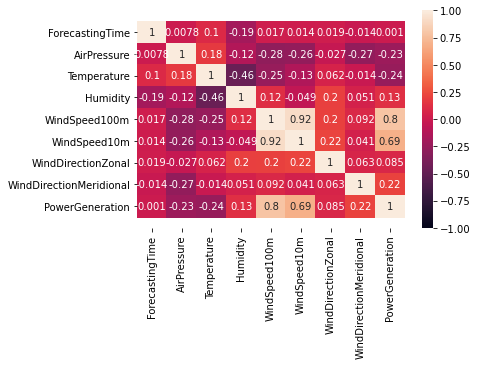

,ForecastingTime,AirPressure,Temperature,Humidity,WindSpeed100m,WindSpeed10m,WindDirectionZonal,WindDirectionMeridional,PowerGeneration
ForecastingTime,1.000000,0.007793,0.101155,-0.185808,0.017356,0.014197,0.018628,-0.014448,0.001029
AirPressure,0.007793,1.000000,0.177045,-0.124871,-0.275826,-0.264816,-0.027073,-0.273173,-0.225674
Temperature,0.101155,0.177045,1.000000,-0.455073,-0.245440,-0.126689,0.061547,-0.013586,-0.243370
Humidity,-0.185808,-0.124871,-0.455073,1.000000,0.120626,-0.049084,0.197907,0.050937,0.128514
WindSpeed100m,0.017356,-0.275826,-0.245440,0.120626,1.000000,0.920392,0.203673,0.091671,0.796380
WindSpeed10m,0.014197,-0.264816,-0.126689,-0.049084,0.920392,1.000000,0.224041,0.041448,0.692179
WindDirectionZonal,0.018628,-0.027073,0.061547,0.197907,0.203673,0.224041,1.000000,0.063393,0.084614
WindDirectionMeridional,-0.014448,-0.273173,-0.013586,0.050937,0.091671,0.041448,0.063393,1.000000,0.216298
PowerGeneration,0.001029,-0.225674,-0.243370,0.128514,0.796380,0.692179,0.084614,0.216298,1.000000


In [14]:
corr = df.corr()
plt.figure(figsize=(6, 4))
ax = sns.heatmap(corr, vmin = -1, vmax = 1, annot = True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()
corr

In [8]:
df.index

Index(['0000-01-01 01:00:00', '0000-01-01 02:00:00', '0000-01-01 03:00:00',
       '0000-01-01 04:00:00', '0000-01-01 05:00:00', '0000-01-01 06:00:00',
       '0000-01-01 07:00:00', '0000-01-01 08:00:00', '0000-01-01 09:00:00',
       '0000-01-01 10:00:00',
       ...
       '0001-12-30 13:00:00', '0001-12-30 14:00:00', '0001-12-30 15:00:00',
       '0001-12-30 16:00:00', '0001-12-30 17:00:00', '0001-12-30 18:00:00',
       '0001-12-30 19:00:00', '0001-12-30 20:00:00', '0001-12-30 21:00:00',
       '0001-12-30 22:00:00'],
      dtype='object', name='Time', length=16920)

In [9]:
# fix dates
new_index = []
for stamp in df.index:
    new = '2' + stamp[1:] 
    new_index.append(new)
    
df.index = pd.to_datetime(new_index)

df.head()

,ForecastingTime,AirPressure,Temperature,Humidity,WindSpeed100m,WindSpeed10m,WindDirectionZonal,WindDirectionMeridional,PowerGeneration
2000-01-01 01:00:00,25,0.392238,0.406113,0.638134,0.625094,0.548931,0.820776,0.883540,0.506970
2000-01-01 02:00:00,26,0.379920,0.405190,0.614377,0.628325,0.563099,0.812227,0.890531,0.579394
2000-01-01 03:00:00,27,0.367603,0.404268,0.590621,0.631556,0.577266,0.803525,0.897331,0.524848
2000-01-01 04:00:00,28,0.360061,0.401325,0.598596,0.629573,0.582233,0.791599,0.906165,0.543939
2000-01-01 05:00:00,29,0.352519,0.398381,0.606571,0.627590,0.587199,0.779416,0.914640,0.620606


No handles with labels found to put in legend.


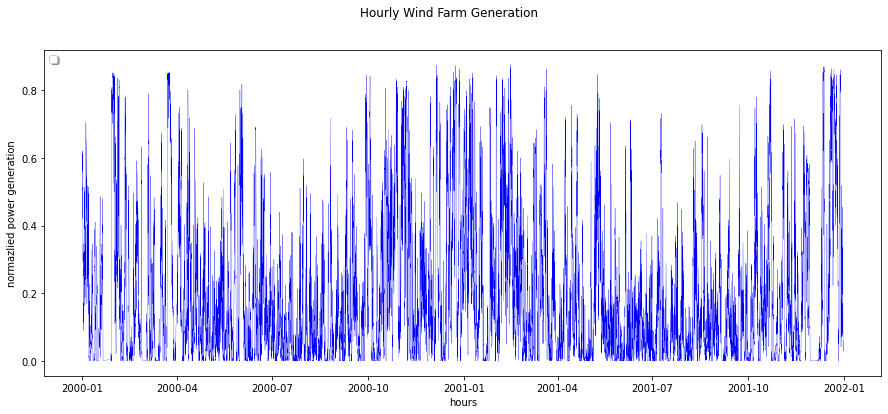

In [24]:
## hourly generation
##import pandas pd
df_hrs = df_nodate = pd.read_csv(r'C:\Users\dabre\OneDrive\Desktop\WindForecasting_CapstoneProject\data1\wf1.csv')
fig = plt.figure(figsize=(15, 6))
ax = plt.axes()
plt.suptitle('Hourly Wind Farm Generation')
plt.plot(df['PowerGeneration'], color='blue', linewidth=.25)
plt.ylabel('normazlied power generation')
plt.xlabel('hours')
plt.legend(loc="upper left", bbox_to_anchor=[0, 1],
           ncol=2, shadow=True, fancybox=True)
fig.savefig('WindPower_allhours.png', dpi=200, bbox_inches='tight')

# Wind Farm Power Hourly Generation

No handles with labels found to put in legend.


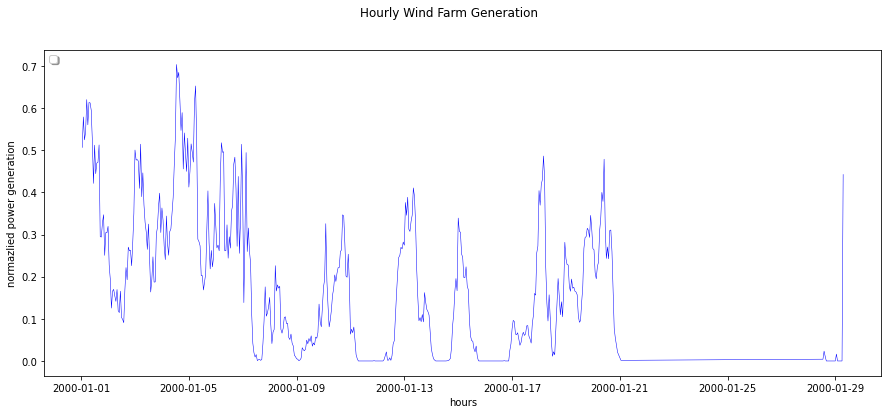

In [23]:
## hourly generation
fig = plt.figure(figsize=(15, 6))
ax = plt.axes()
plt.suptitle('Hourly Wind Farm Generation')
plt.plot(df['PowerGeneration'].iloc[0:500], color='blue', linewidth=.5)
plt.ylabel('normazlied power generation')
plt.xlabel('hours')
plt.legend(loc="upper left", bbox_to_anchor=[0, 1],
           ncol=2, shadow=True, fancybox=True)
fig.savefig('WindPower_500hours.png', dpi=200, bbox_inches='tight')

## Power Generation and Wind Speed

No handles with labels found to put in legend.


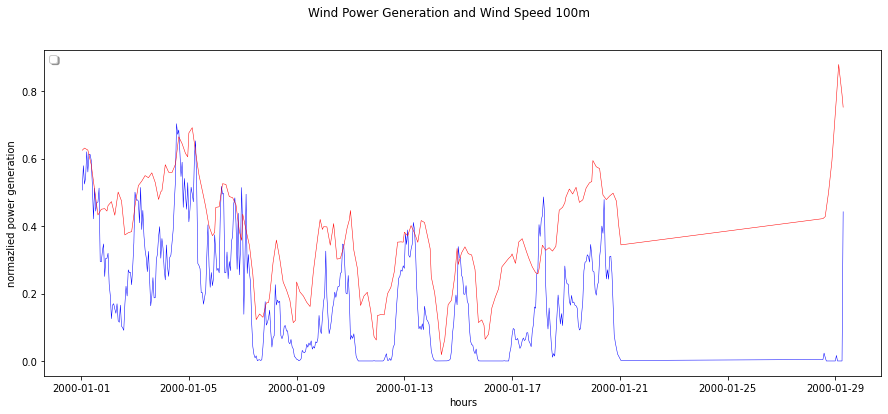

In [12]:
# wind speed 100m
fig = plt.figure(figsize=(15, 6))
ax = plt.axes()
plt.suptitle('Wind Power Generation and Wind Speed 100m')
plt.plot(df['PowerGeneration'].iloc[0:500], color='blue', linewidth=.5)
plt.plot(df['WindSpeed100m'].iloc[0:500], color='red', linewidth=.5)
plt.ylabel('normazlied power generation')
plt.xlabel('hours')
plt.legend(loc="upper left", bbox_to_anchor=[0, 1],
           ncol=2, shadow=True, fancybox=True)
fig.savefig('PowerGenerationWindSpeed100m.png', dpi=200, bbox_inches='tight')

No handles with labels found to put in legend.


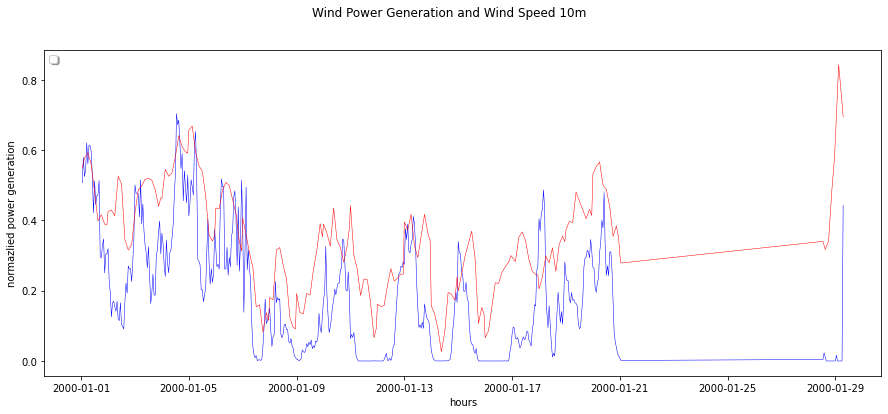

In [13]:
# wind speed 10m
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15, 6))
ax = plt.axes()
plt.suptitle('Wind Power Generation and Wind Speed 10m')
plt.plot(df['PowerGeneration'].iloc[0:500], color='blue', linewidth=.5)
plt.plot(df['WindSpeed10m'].iloc[0:500], color='red', linewidth=.5)
plt.ylabel('normazlied power generation')
plt.xlabel('hours')
plt.legend(loc="upper left", bbox_to_anchor=[0, 1],
           ncol=2, shadow=True, fancybox=True)
#fig.savefig('PowerGenerationWindSpeed100m.png', dpi=200, bbox_inches='tight')

## Power Generation Autocorrelation Plot
* Wind (speed/power) time-series data typically exhibit autocorrelation, which can be defined as the degree of dependence on preceding values.

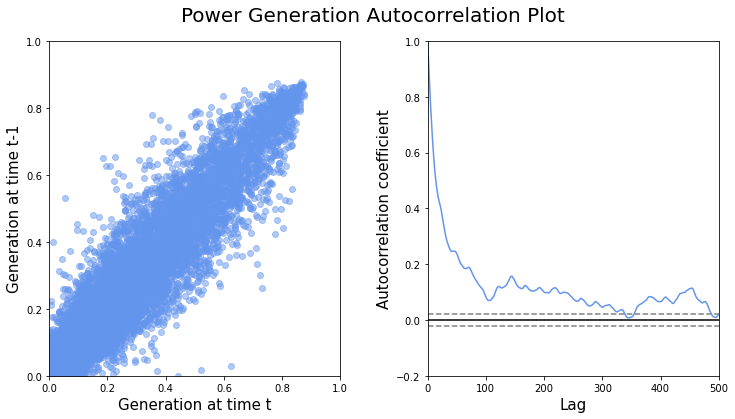

In [14]:
# autocorrelation of wind farm power generation.

fig, axes = plt.subplots( nrows=1, ncols=2, figsize=(12,6) )
plt.subplots_adjust( wspace=0.30, hspace=0.20, top=0.90 )
plt.suptitle("Power Generation Autocorrelation Plot", fontsize=20)

series0 = df['PowerGeneration']
axes[0].scatter(series0, series0.shift(periods=1), color="cornflowerblue", alpha=0.5)
axes[0].set_xlim([0.0, 1.0])
axes[0].set_ylim([0.0, 1.0])
axes[0].set_xlabel("Generation at time t", fontsize=15)
axes[0].set_ylabel("Generation at time t-1", fontsize=15)

nmax = len(series0)
lags = range(0, nmax)
ci95 = 1.96/np.sqrt(float(nmax))
ci99 = 2.58/np.sqrt(float(nmax))
data = np.asarray(series0[:nmax])
c0   = np.var(data, ddof=0)
a1   = np.mean(data)
correlations = [((data[:nmax-k]-a1)*(data[k:]-a1)).sum()/float(nmax)/c0 for k in lags]
axes[1].plot(lags, correlations, color="cornflowerblue")
axes[1].hlines(y=0.0, xmin=0.0, xmax=500.0, color='k')
axes[1].hlines(y=ci99,  xmin=0.0, xmax=500.0, colors='k', linestyles='dashed', alpha=0.5)
axes[1].hlines(y=-ci99, xmin=0.0, xmax=500.0, colors='k', linestyles='dashed', alpha=0.5)
axes[1].set_xlim([0.0, 500.0])
axes[1].set_ylim([-0.20, +1.0])
axes[1].set_xlabel("Lag", fontsize=15)
axes[1].set_ylabel("Autocorrelation coefficient", fontsize=15)

plt.show()
fig.savefig('autocorrelations_500h.png', dpi=200, bbox_inches='tight')

## Matrix of Correlation Plots 

C:\Users\dabre\Anaconda3\envs\tensorflow_gpuenv\lib\site-packages\seaborn\axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


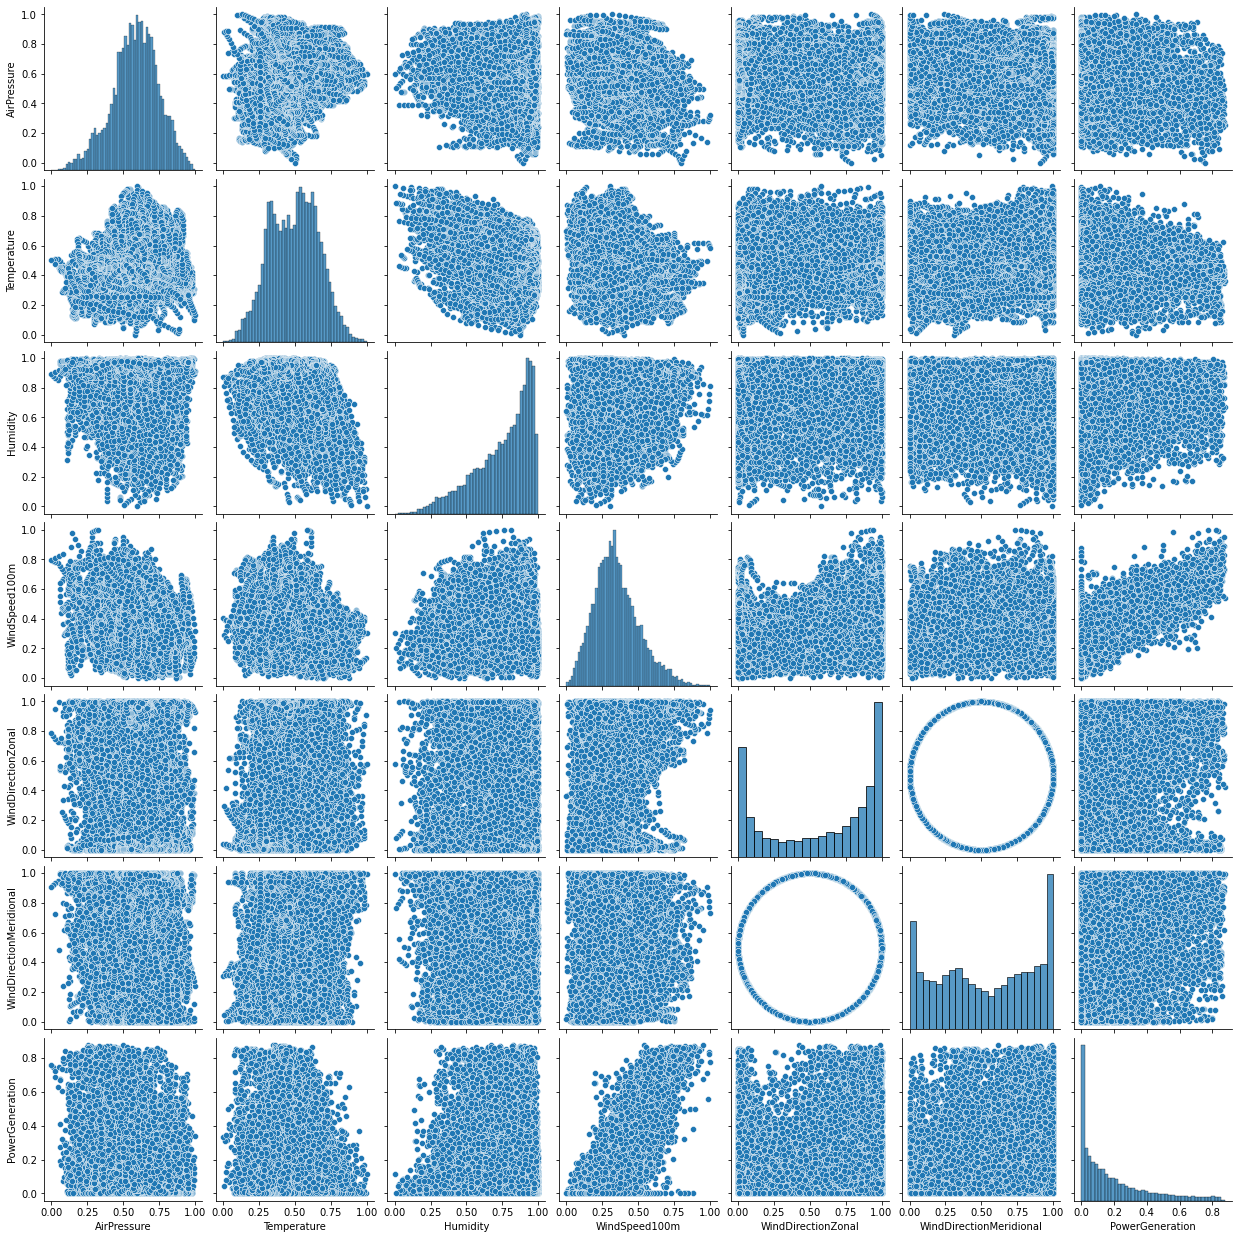

In [15]:
# Compute matrix of correlation plots between select features and target variable.

cols = [('AirPressure'), ('Temperature'), ('Humidity'), ('WindSpeed100m'), ('WindDirectionZonal'), 
        ('WindDirectionMeridional'), ('PowerGeneration')]
sns.pairplot(df[cols], size=2.5)
plt.show()
